# The Sparks Foundation

## Unsupervised Learning on Iris Dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import dataset
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# id is not of any use, simply drop it
data.drop('Id',axis=1,inplace=True)

**Missing Values**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# data distribution across target column
pd.crosstab(index=data['Species'],columns="count").reset_index()

col_0,Species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


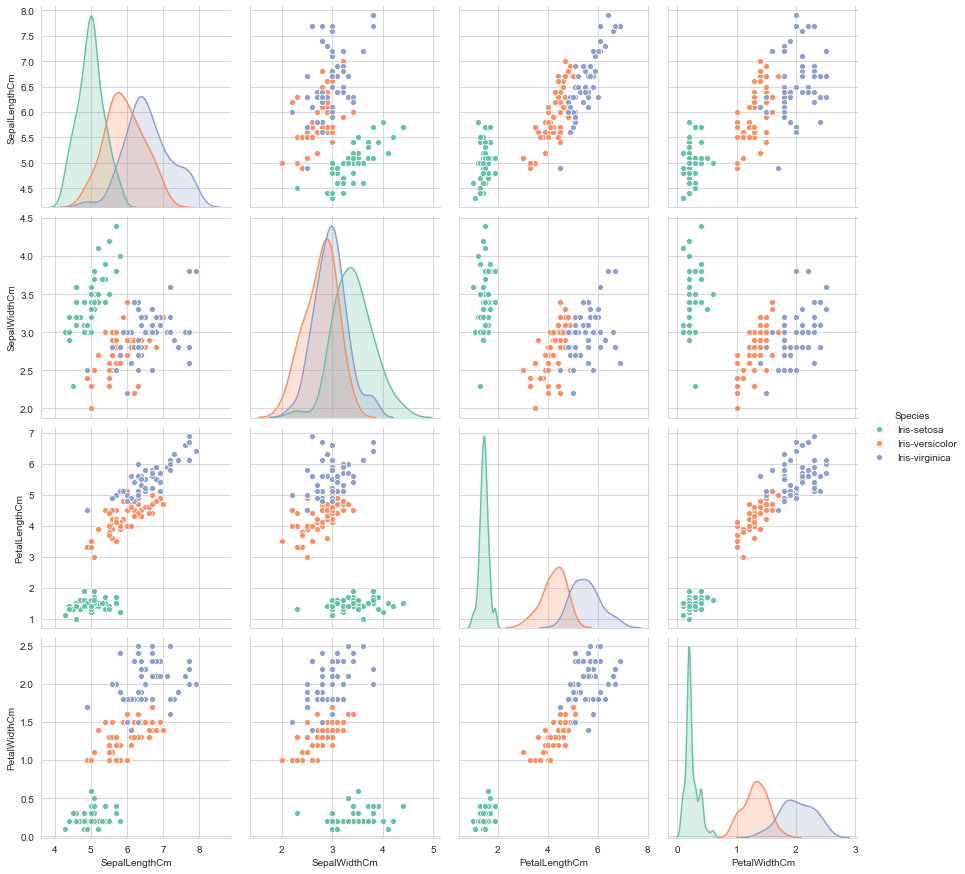

In [6]:
# let's visualize the target
sns.set_style("whitegrid")
sns.pairplot(hue='Species',data=data,palette="Set2",size=3)
plt.show()

**here, we can see that iris-setosa is easily separable from other 2 classes. Especially when visualized with different colors**

**Whatever, our aim is to find the labels that we didn't know, so let's create the suitable scenario**

In [7]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
#only take the independent variables
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

## Implimenting K-Means Algorithm

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)

**Why 99?!!. Because I don't know the accuracte number of cluster. But there is solution for it.**

### Finding the optimum number of clusters to get most accurate result

**I will be using a Elbow rule, which is basically looking for a plot line that respectively has a slope nearest to 90 deg compared to y-axis and be smallest possible.**

In [10]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

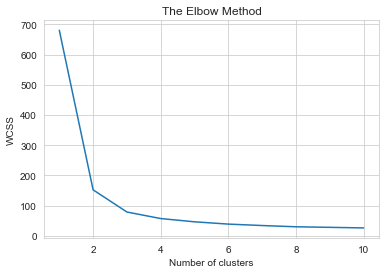

In [11]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")       #Within cluster sum of square
plt.show()

**3 OR 2 Seems to be the best value for cluster**

### Let's Double Check it

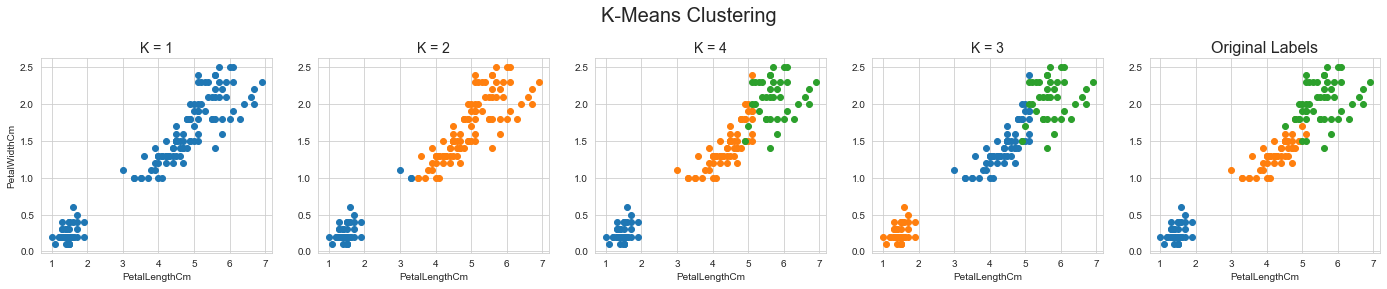

In [12]:
plt.figure(figsize=(24,4))

plt.suptitle("K-Means Clustering", fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1", fontsize=14)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm, features.PetalWidthCm)

plt.subplot(1,5,2)
plt.title("K = 2", fontsize=14)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0], features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1], features.PetalWidthCm[features.labels == 1])

#drop the labels because we only need features
features.drop("labels", axis=1, inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3", fontsize=14)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0], features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1], features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2], features.PetalWidthCm[features.labels == 2])

#drop the labels because we only need features
features.drop("labels", axis=1, inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4", fontsize=14)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0], features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1], features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2], features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3], features.PetalWidthCm[features.labels == 3])

#drop the labels because we only need features
features.drop("labels", axis=1, inplace=True)


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(data.PetalLengthCm[data.Species == "Iris-setosa"],data.PetalWidthCm[data.Species == "Iris-setosa"])
plt.scatter(data.PetalLengthCm[data.Species == "Iris-versicolor"],data.PetalWidthCm[data.Species == "Iris-versicolor"])
plt.scatter(data.PetalLengthCm[data.Species == "Iris-virginica"],data.PetalWidthCm[data.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

**K-Means really did an amazing job with 3 clusters. Except few data points, we can see that prediction in identical to original labels, which shows that Elbow chart was right**

## Implementing Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

hc_cls = AgglomerativeClustering(n_clusters=99)

### Finding the best value of clusters

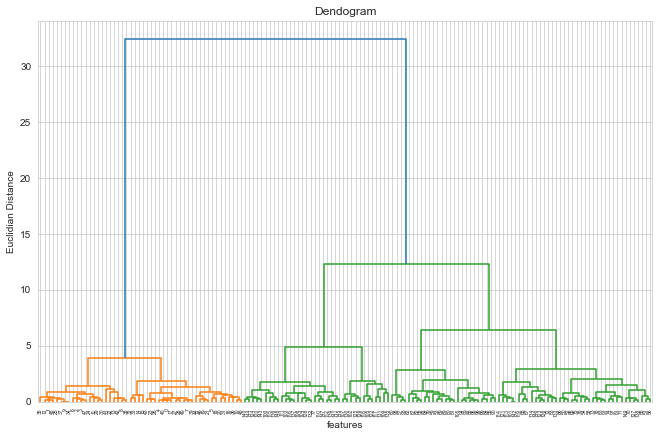

In [19]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(11,7))
dendogram = sch.dendrogram(sch.linkage(features, method = "ward"))
plt.title("Dendogram")
plt.xlabel("features")
plt.ylabel("Euclidian Distance")
plt.show()

**We can see that longest vertical line without any perpendicular matching lines(euclidian distance). If we draw a horizontal line between them, then we will have 3 intercepetions which is ideal value of labels**

## Evaluate the Results and Compare them

In [22]:
#K-Means
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)
## cross tabulation table for K-Means
df1 = pd.DataFrame({"labels":kmeans_predict, "Species":data['Species']})
crt1 = pd.crosstab(df1['labels'], df1['Species'])

#Hierarchical clustering
hrc_cluster = AgglomerativeClustering(n_clusters=3)
hrc_predict = hrc_cluster.fit_predict(features)
## cross tabulation table for K-Means
df2 = pd.DataFrame({"labels":hrc_predict, "Species":data['Species']})
crt2 = pd.crosstab(df2['labels'], df2['Species'])


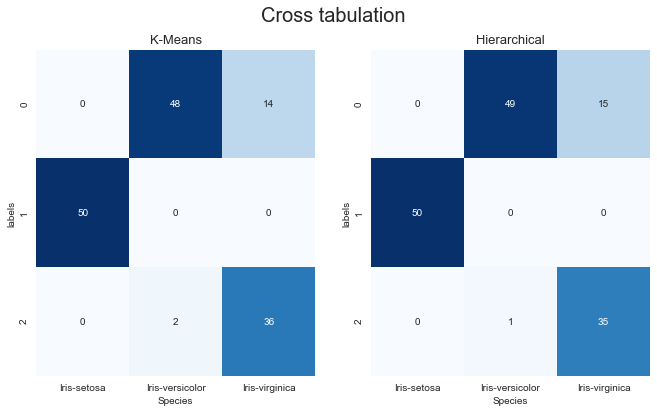

In [26]:
#visualize the results
plt.figure(figsize=(11,6))
plt.suptitle("Cross tabulation", fontsize=20)
plt.subplot(1,2,1)
plt.title("K-Means", fontsize=13)
sns.heatmap(crt1, annot=True, cbar=False, cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchical", fontsize=13)
sns.heatmap(crt2, annot=True, cbar=False, cmap="Blues")

plt.show()

### Observations
- **The overall accuracy of both the model is approximate 90%, they both failed at 16th data point out of 150 data point.**
- **Clustering Iris-Setosa was very easy as it was very different from other 2 classes**
- **Clustering Iris-Virginica was difficult for the model, 15 mistakes is coming out from the model.**

## THANK YOU!.